**END-TO-END MACHINE LEARNING MODEL**

---



***IMPORTING LIBRARIES***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**LOADING DATASET**

In [4]:
dataset=pd.read_csv("/content/old_car_data.csv")

**To view the head of dataset**

In [54]:
dataset.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


**sns.heatmap(dataset.corr(), annot=True): The heatmap function is used to create a heatmap, a type of visualization that represents data in a grid format using colors.
dataset.corr(): The corr() method calculates the correlation matrix for the dataset. Correlation measures how strongly two variables are related. The result is a table (or matrix) that shows correlation values between pairs of variables in the dataset. The values range from -1 to 1, where:
1 means a perfect positive correlation,
0 means no correlation,
-1 means a perfect negative correlation.
annot=True: This means "annotate the heatmap". It tells seaborn to write the correlation values inside the heatmap squares. This makes it easier to see the exact correlation values.
plt.show(): This line makes the grid appear on the screen so you can see it.**

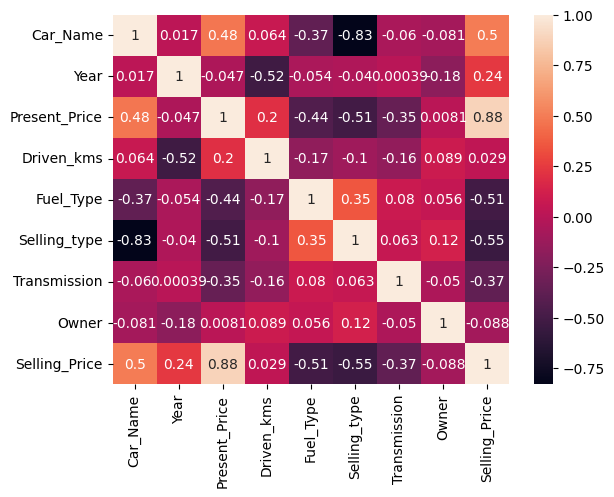

In [19]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

**Checking the missing values in each column in the dataset**

In [8]:
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

**Viewing the information in the dataset**

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**LabelEncoder() it works as : it fit and transform the categorical data in to numerical data**

In [10]:
Car_Name_le=LabelEncoder()
dataset["Car_Name"]=Car_Name_le.fit_transform(dataset["Car_Name"])

In [11]:
dataset["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [12]:
Fuel_Type_le=LabelEncoder()
dataset["Fuel_Type"]=Fuel_Type_le.fit_transform(dataset["Fuel_Type"])

In [13]:
Selling_type_le=LabelEncoder()
dataset["Selling_type"]=Selling_type_le.fit_transform(dataset["Selling_type"])

In [14]:
Transmission_le=LabelEncoder()
dataset["Transmission"]=Transmission_le.fit_transform(dataset["Transmission"])

**To view the input data and output data. output data is subtracted from the input data**

In [15]:
input_data=dataset.iloc[:,:-1]
output_data=dataset["Selling_Price"]

**Standard Deviation works as:This ensures that all features have a mean of 0 and a standard deviation of 1, making it easier to analyze and build models that perform well.**


In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
input_data=pd.DataFrame(sc.fit_transform(input_data),columns=input_data.columns)
input_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1.074323,0.128897,-0.236256,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221544,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257472,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403151,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087906,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460295,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200328,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390756,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564604,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


**Trainig and Testing of the model**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

**Applying Machine Learning Model**

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

**Linear Regression**

In [23]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(88.37319983657575, 84.64540623816023)

**Lasso Regression**

In [26]:
lr1=Lasso(alpha=0.5)
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(84.97850283697773, 78.61579474866672)

**Ridge Regression**

In [27]:
lr2=Ridge(alpha=0.5)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(88.37285554185003, 78.61579474866672)

**ElasticNet**

In [28]:
lr3=ElasticNet(alpha=0.5)
lr3.fit(x_train,y_train)
lr2.score(x_train,y_train)*100,lr3.score(x_test,y_test)*100

(88.37285554185003, 78.30585703855934)

**Decision Trees**

In [38]:
dt=DecisionTreeRegressor(max_depth=13)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.99983614119861, 95.35171071689443)

**Random Forest**

In [37]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(97.8990819661911, 96.3802157686465)

**Support Vector Regression**

In [32]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(65.97241944268558, 78.47547496129359)

**K-nearest neighbour algorithm**

In [35]:
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100,knn.score(x_test,y_test)*100

(86.58377579902347, 90.59004346126326)

**checking the errors**

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
dt=DecisionTreeRegressor(max_depth=13)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.99987522774822, 95.38608177339407)

In [41]:
mean_squared_error(y_test,dt.predict(x_test))

1.0628430327868854

In [42]:
mean_absolute_error(y_test,dt.predict(x_test))

0.6525409836065573

**checking the errors in random forest**

In [43]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(98.38189928213293, 96.0897590576887)

In [44]:
mean_squared_error(y_test,rf.predict(x_test))

0.900746857213115

In [45]:
mean_absolute_error(y_test,dt.predict(x_test))

0.6525409836065573

In [50]:
rf.predict([[-1.275759,	0.821718,	-0.818069	,-0.333500	,0.500183,	1.356327,	-2.554408,	-0.174501]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.4403])

In [53]:
x_test

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
177,-1.275759,0.821718,-0.818069,-0.333500,0.500183,1.356327,-2.554408,-0.174501
289,0.251795,0.821718,0.692093,-0.668875,0.500183,-0.737285,0.391480,-0.174501
228,1.230996,-0.563924,0.205318,0.593804,-1.852241,-0.737285,0.391480,-0.174501
198,-2.059120,-0.910335,-0.818069,-0.050157,0.500183,1.356327,0.391480,3.865859
60,0.330131,-0.217514,1.272746,0.078661,0.500183,-0.737285,0.391480,-0.174501
...,...,...,...,...,...,...,...,...
234,0.760979,0.475308,-0.223508,-0.835995,0.500183,-0.737285,0.391480,-0.174501
296,0.251795,0.821718,0.460295,-0.076225,-1.852241,-0.737285,0.391480,-0.174501
281,0.251795,-2.642389,-0.003300,0.347965,0.500183,-0.737285,0.391480,-0.174501
285,0.956819,0.821718,0.101009,-0.563806,0.500183,-0.737285,-2.554408,-0.174501


In [51]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

**Giving inputs from user in this machine learning model**

In [64]:
new_data=pd.DataFrame([['ritz',	2014,	5.59,	27000,	'Petrol',	'Dealer',	'Manual',	0	]],columns=x_train.columns)

In [65]:
new_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0


**Converting categorical data into numerical data by LabelEncoder() **

**at first, it fit and transform the data in to numerical data**

**Car_Name**

In [67]:
new_data["Car_Name"]=Car_Name_le.transform(new_data["Car_Name"])

**Fuel_Type**

In [69]:
new_data["Fuel_Type"]=Fuel_Type_le.transform(new_data["Fuel_Type"])

**Selling_type**

In [70]:
new_data["Selling_type"]=Selling_type_le.transform(new_data["Selling_type"])

**Transmission**

In [71]:
new_data["Transmission"]=Transmission_le.transform(new_data["Transmission"])

**Our new_data is finally converted into numerical data **

In [72]:
new_data

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0


**Scaling the data **

In [81]:

new_data=pd.DataFrame(sc.fit_transform(new_data),columns=new_data.columns)
new_data

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Predicting the new_data (x_test) by random forest algorithm**

In [82]:
rf.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.007])